In [3]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
#from sklearn.externals import joblib

from IPython.display import display

In [4]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv(r'C:\Users\02gsh\Desktop\datasets\all_read_binary.csv')

In [5]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 197
Number of Instances In Dataset :  1905


In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Assuming your CSV file has columns/features and a target column named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Preprocess the data (standardization and label encoding)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.20, random_state=20)

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       242
           1       0.81      0.81      0.81       139

    accuracy                           0.86       381
   macro avg       0.85      0.85      0.85       381
weighted avg       0.86      0.86      0.86       381



In [13]:
dt1=DecisionTreeClassifier(random_state=120, max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       242
           1       0.85      0.79      0.82       139

    accuracy                           0.87       381
   macro avg       0.87      0.85      0.86       381
weighted avg       0.87      0.87      0.87       381



In [14]:
rfc1=RandomForestClassifier(random_state=200, n_estimators= 125, max_depth=7, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       242
           1       0.98      0.65      0.78       139

    accuracy                           0.87       381
   macro avg       0.91      0.82      0.85       381
weighted avg       0.89      0.87      0.86       381



In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

C:\Users\02gsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       242
           1       0.80      0.84      0.82       139

    accuracy                           0.87       381
   macro avg       0.85      0.86      0.86       381
weighted avg       0.87      0.87      0.87       381

Confusion Matrix:


array([[213,  29],
       [ 22, 117]], dtype=int64)

In [18]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8556430446194225
Train Set Accuracy: 0.9396325459317585


In [19]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning 
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 
  
# print classification report 
print("\n", classification_report(y_test, predSVC)) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.773 total time=   0.2s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.765 total time=   0.2s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.781 total time=   0.2s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.841 total time=   0.2s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.769 total time=   0.3s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.000 total time=   0.3s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.000 total time=   0.2s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.000 total time=   0.4s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.000 total time=   0.3s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.000 total time=   0.3s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.842 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.883 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.816 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.867 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.769 total time=   0.2s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.768 total time=   0.3s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.783 total time=   0.5s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.4s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.772 total time=   0.3s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.811 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.828 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.824 total time=   0.1s
[CV 4/5] END .......C=1, gam

[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.308 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.228 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.215 total time=   0.1s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.283 total time=   0.1s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.260 total time=   0.1s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.780 total time=   2.6s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.774 total time=   4.5s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.815 total time=   3.6s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.764 total time=   6.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.758 total time=   3.8s
[CV 1/5] END ....C=10, gamma

In [20]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       242
           1       0.81      0.49      0.61       139

    accuracy                           0.77       381
   macro avg       0.79      0.71      0.72       381
weighted avg       0.78      0.77      0.76       381



In [21]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))  
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.905511811023622, 0.916010498687664, 0.9002624671916011, 0.916010498687664, 0.8923884514435696, 0.8976377952755905, 0.8818897637795275, 0.889763779527559]


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

In [27]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN)]
        
}
chart = pd.DataFrame(chart)
display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN
0,Accuracy,0.871391,0.868766,0.866142,0.913386,0.771654,0.916010
1,F1-Score,0.817844,0.784483,0.821053,0.879121,0.609865,0.878788
2,Recall,0.791367,0.654676,0.841727,0.863309,0.489209,0.834532
3,Precision,0.846154,0.978495,0.801370,0.895522,0.809524,0.928000


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

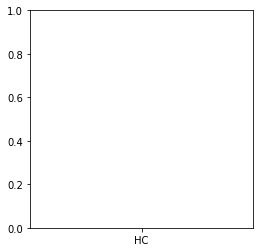

In [38]:
# Calculate the count of each label
label_counts = df['labels'].value_counts()
plt.figure(figsize=(4,4))

# Create bar graph
plt.bar(['HC', 'PD'], label_counts, color=['blue', 'orange'], width=0.4)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('HC (0) vs PD (1) Distribution')
# Add count numbers above the bars
for i, count in enumerate(label_counts):
    plt.text(i, count + 12, str(count), ha='center')

# Show the plot
plt.show()



